In [ ]:
from env import BSEnv

from agents.bs_call_learning_agent import BSCallLearningAgent
from agents.simple_agent import SimpleAgent
from agents.aggressive_agent import AggressiveAgent
from agents.smarter_simple_agent import SmartSimpleAgent
from agents.random_agent import RandomAgent
from trainingenv import TrainingBSEnv
from agents.smart_expected_value_agent import SmartExpectedValueAngent
from agents.dqn_agent import DQNAgent
from IPython.display import display, clear_output

from agents.dqn_agent import Transition
from agents.dqn_agent import action_decode
from agents.dqn_agent import action_encode

import game_metrics as gm

import matplotlib.pyplot as plt

import torch

import time

from collections import deque

cards = ["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"]

total_results = []


In [ ]:
%matplotlib inline
plt.ion()

simple_model = torch.load("model1smartersimple.pt", weights_only=True)

ep_decay = 500

load_model = torch.load("model550000.pt")
dqn_args = {
    "num_decks": 1,
    "learning_rate": 0.001,
    "train_every": 100,
    "batch_size": 64,
    "ep_decay": ep_decay,
    "ep_start": 0.1,
    "required_confidence": 0.8,
    "load_models" : load_model,
    "training": True
}


# training
env = TrainingBSEnv(
    [DQNAgent, DQNAgent, DQNAgent, DQNAgent],
    agent_args=[
        dqn_args,
        dqn_args,
        dqn_args,
        dqn_args
    ],
)

#total_results = []


In [ ]:

NUM_EPISODES = 0
PRINT_EVERY = 200

if ep_decay > NUM_EPISODES / 1.5 or ep_decay < NUM_EPISODES / 20:
    print("are you sure this is what youw want?")

print("Starting training...")


def render_graphs():
    plt.close("all")
    gm.plt_avg_delta_cards(total_results, 0)
    gm.plt_avg_delta_cards(total_results, 1)
    gm.plt_avg_delta_cards(total_results, 2)
    gm.plt_avg_delta_cards(total_results, 3)
    gm.plt_win_rate(total_results, 0)
    gm.plt_win_rate(total_results, 1)
    gm.plt_win_rate(total_results, 2)
    gm.plt_win_rate(total_results, 3)
    gm.plt_bs_called_accuracy_not_free(total_results, 0)
    gm.plt_bs_called_accuracy_not_free(total_results, 1)
    gm.plt_bs_called_accuracy_not_free(total_results, 2)
    gm.plt_bs_called_accuracy_not_free(total_results, 3)
    gm.plt_bs_accuracy(total_results, 0)
    gm.plt_bs_accuracy(total_results, 1)
    gm.plt_bs_accuracy(total_results, 2)
    gm.plt_bs_accuracy(total_results, 3)
    gm.plt_bs_call_rate(total_results, 0)
    gm.plt_bs_call_rate(total_results, 1)
    gm.plt_bs_call_rate(total_results, 2)
    gm.plt_bs_call_rate(total_results, 3)
    gm.plt_true_bs_ratio(total_results, player_indexes=[0,1,2,3])
    gm.plt_duration(total_results)


for episode in range(1, NUM_EPISODES + 1):
    results = env.run_game()
    env.rotate_dealer()
    total_results.append(results)
    # print(episode, results.winner)

    if episode % 20 == 0 or episode <= 20:
        print(f"Episode: {episode}, Duration: {len(results.rounds)}, Winner: {results.winner}")

    if episode % PRINT_EVERY == 0:
        clear_output(wait=True)
        print(f"Episode: {episode}")
        render_graphs()
        plt.show()

d = env.players[3].model.state_dict()
#torch.save(d, "model3simple.pt")

print("Training complete!")

clear_output(wait=True)
render_graphs()

plt.show()


In [ ]:
print(total_results[20].get_text())

In [ ]:
torch.save(env.players[3].save_model(), "modelgood501.pt")

In [4]:
import pickle

with open("total_results_more.pkl", "rb") as f:
    total_results = pickle.load(f)



5000


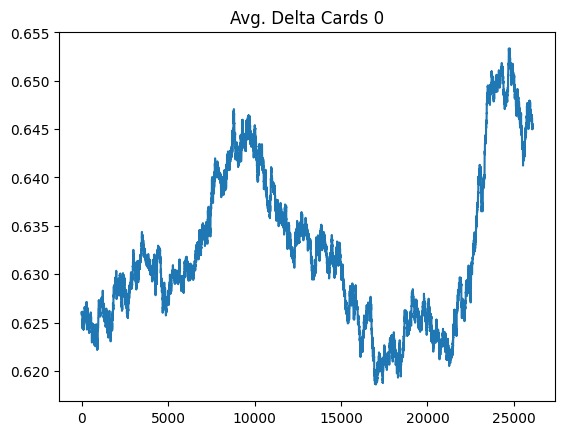

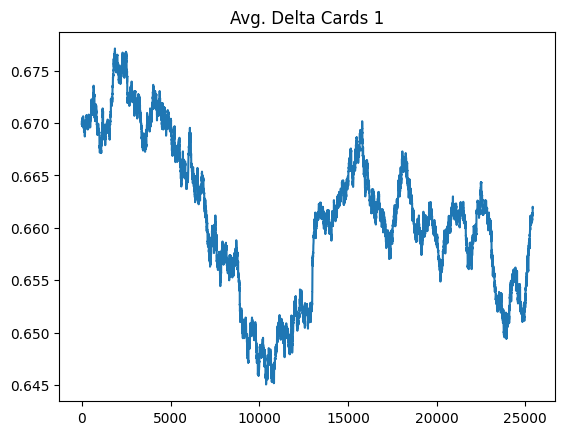

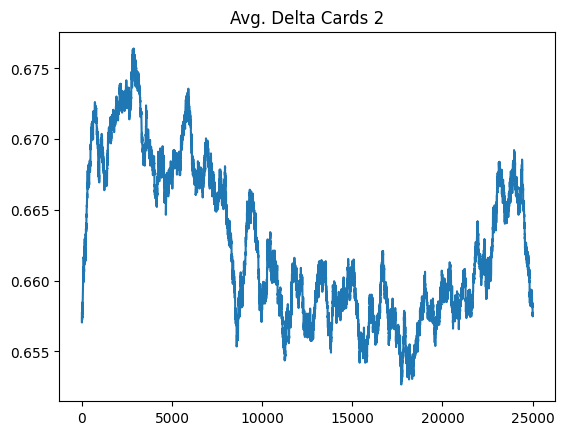

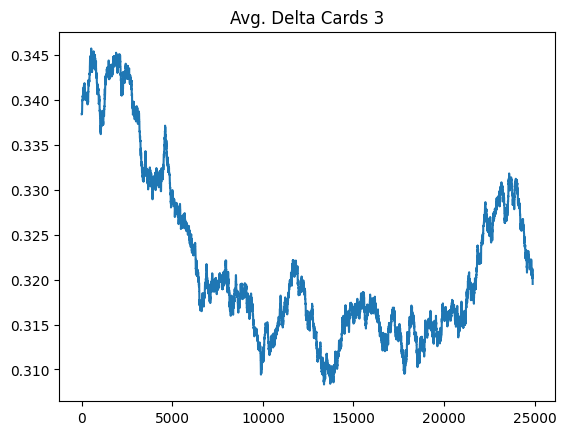

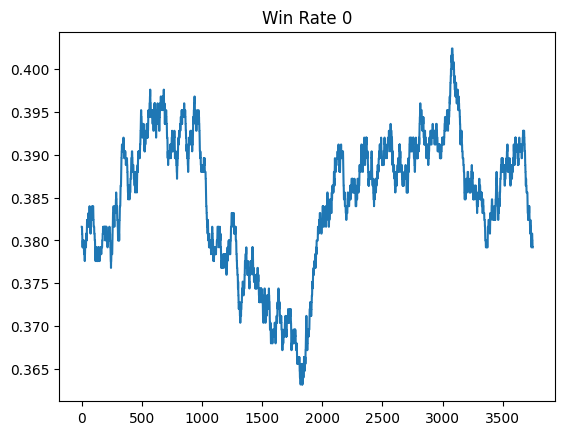

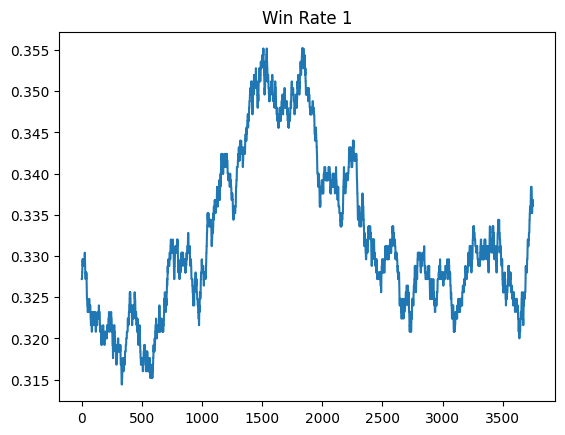

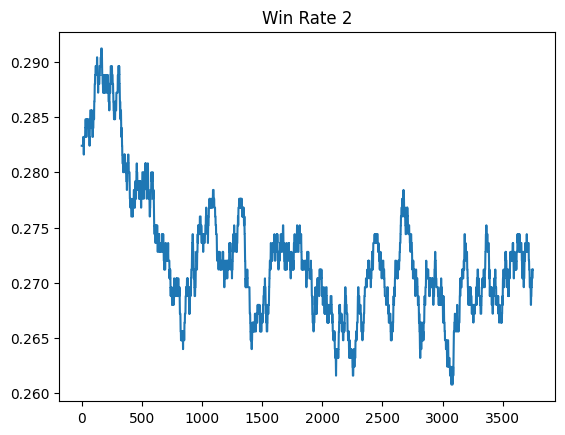

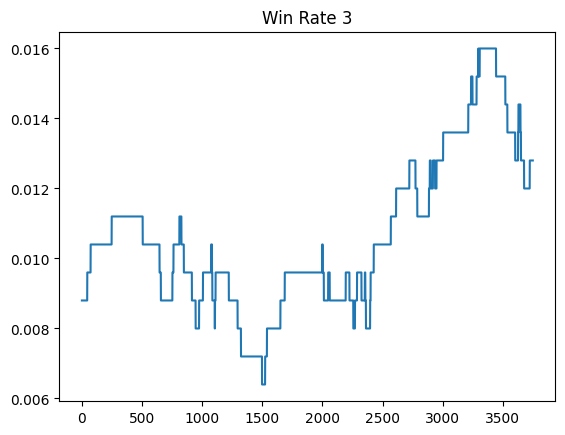

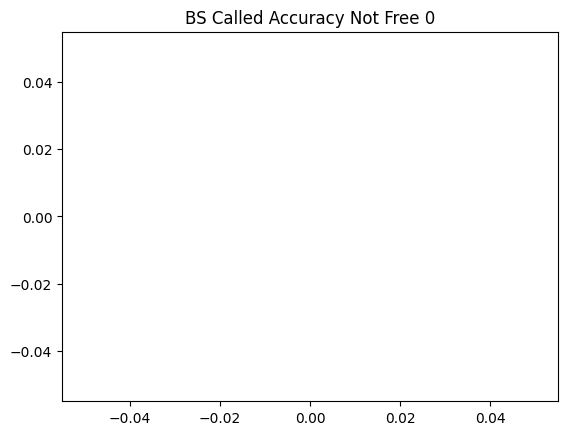

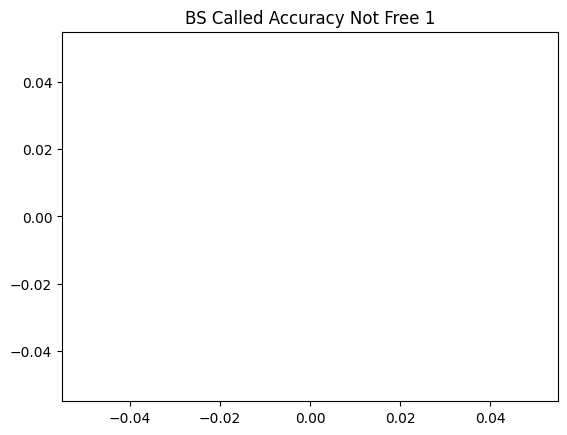

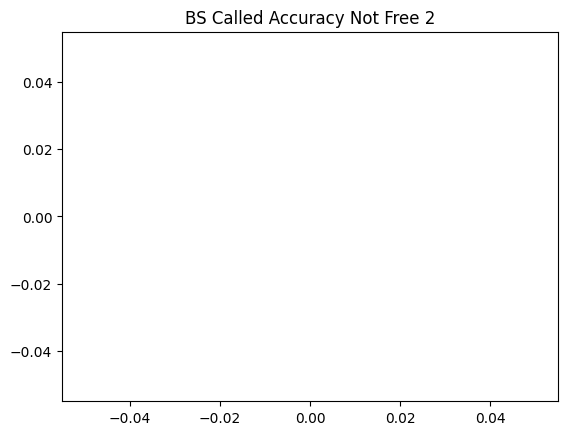

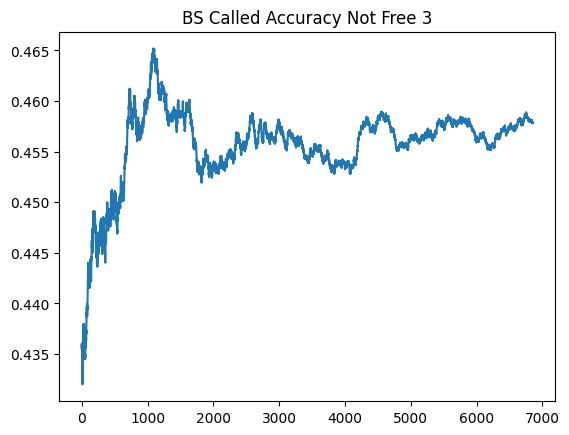

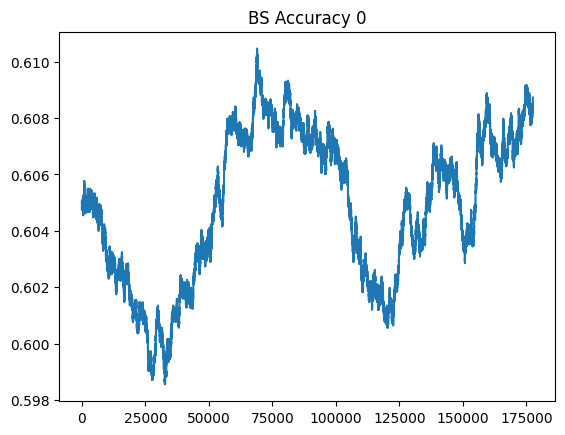

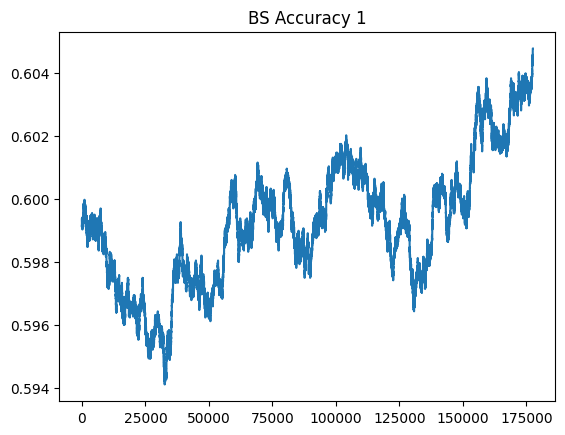

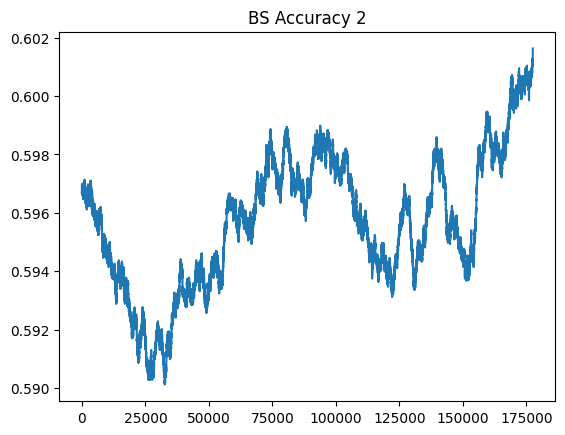

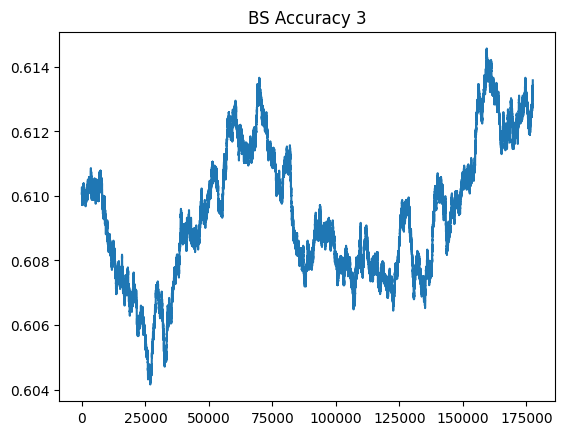

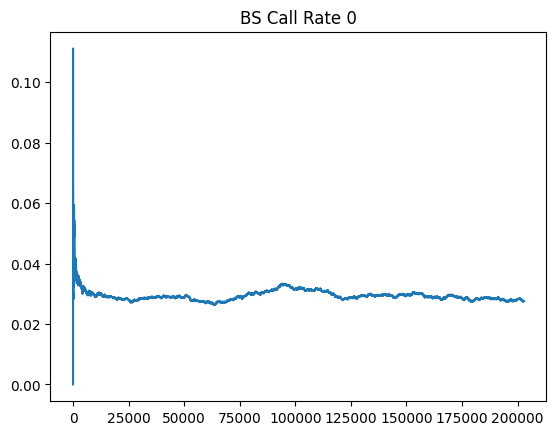

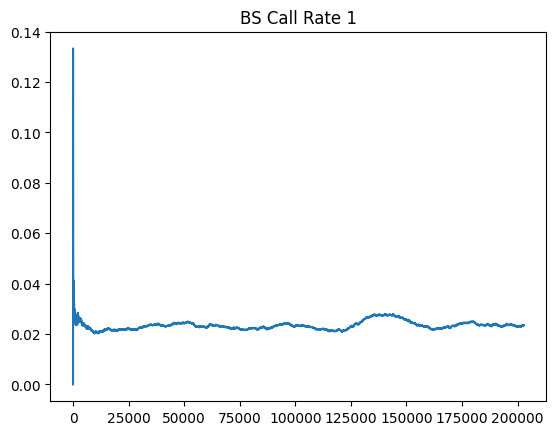

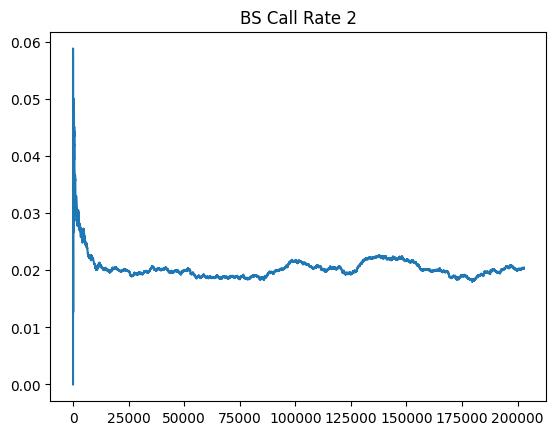

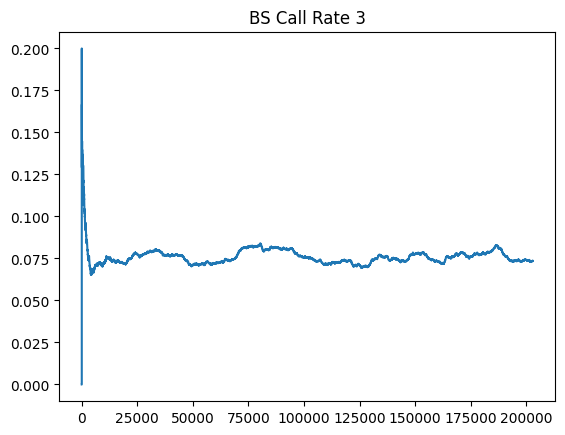

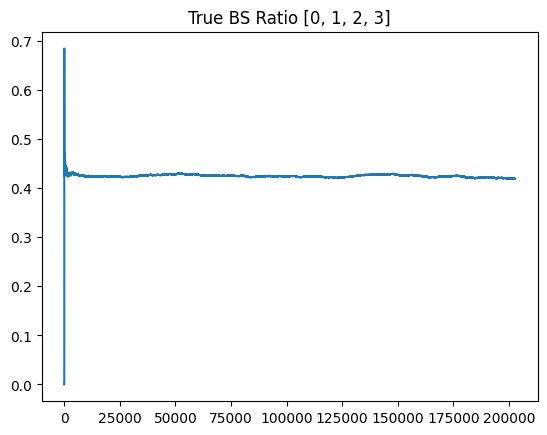

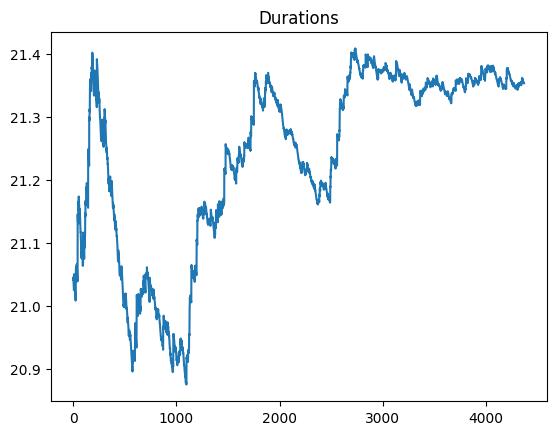

In [5]:
print(len(total_results))
render_graphs()

In [ ]:
print(total_results[4999].get_text())